<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies['duration'].sort_values().head(1)

389    64
Name: duration, dtype: int64

In [7]:
movies['duration'].sort_values().tail(1)

476    242
Name: duration, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

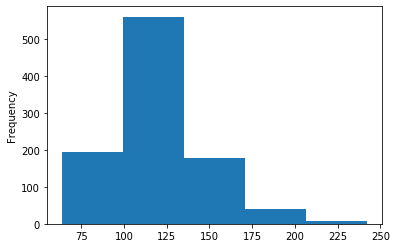

In [8]:
# Answer:
movies.duration.plot(kind ='hist',bins = 5, x ='duration', y = 'frequency')

#drinks.plot(kind='scatter', x='beer_servings', y='spirit_servings')

#### Use a box plot to display that same data.

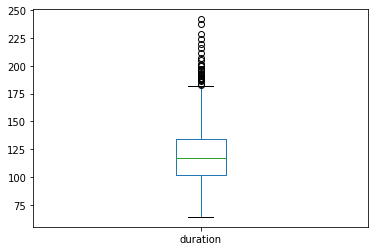

In [9]:
# Answer:
movies.duration.plot(kind ='box', x ='duration', y = 'frequency')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies[['content_rating','title']].groupby('content_rating').count()

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Title Count')

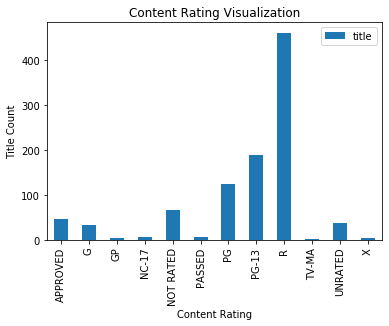

In [11]:
# Answer:
movies[['content_rating','title']].groupby('content_rating').count().plot(kind ='bar', title = 'Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
movies['content_rating'].replace(['NOT RATED','APPROVED', 'PASSED', 'GP'],'UNRATED')

0          R
1          R
2          R
3      PG-13
4          R
       ...  
974       PG
975       PG
976    PG-13
977       PG
978        R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:
movies['content_rating'].replace(['X','TV-MA'],'NC-17')

0          R
1          R
2          R
3      PG-13
4          R
       ...  
974       PG
975       PG
976    PG-13
977       PG
978        R
Name: content_rating, Length: 979, dtype: object

#### Count the number of missing values in each column.

In [14]:
# Answer:
movies.isnull().sum(axis=0)

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [16]:
movies.at[(187,649,936),'content_rating'] = 'PG'

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [17]:
# Answer:
print('Avg. star rating for movies 2 hours or longer: ', movies[movies['duration'] >= 120]['star_rating'].mean(), 
 '\nAvg. star rating for movies shorter than 2 hours: ', movies[movies['duration'] < 120]['star_rating'].mean())



Avg. star rating for movies 2 hours or longer:  7.948898678414082 
Avg. star rating for movies shorter than 2 hours:  7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

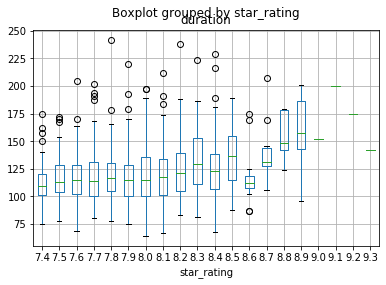

In [18]:
# Answer:
movies.boxplot(column='duration', by='star_rating');

#### Calculate the average duration for each genre.

In [19]:
# Answer:
movies[['duration','genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

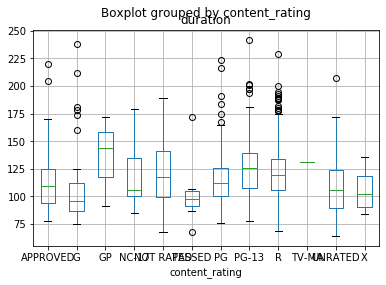

In [20]:
# Answer:
movies.boxplot(column='duration', by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [21]:
# Answer:
movies[['title','genre','star_rating']].groupby('genre').head(1)


,title,genre,star_rating
0,The Shawshank Redemption,Crime,9.3
3,The Dark Knight,Action,9.0
5,12 Angry Men,Drama,8.9
6,"The Good, the Bad and the Ugly",Western,8.9
7,The Lord of the Rings: The Return of the King,Adventure,8.9
8,Schindler's List,Biography,8.9
25,Life Is Beautiful,Comedy,8.6
30,Spirited Away,Animation,8.6
38,Rear Window,Mystery,8.6
39,Psycho,Horror,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
# Answer:
result = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
result.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [23]:
# Answer:
genres = movies['genre'].value_counts()[movies['genre'].value_counts() > 10].index
movies[movies['genre'].isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [24]:
# Answer:
vc_list = movies['genre'].value_counts()
print(vc_list)

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [25]:
# Answer:
#movies[['genre', 'star_rating']].groupby(['genre']).mean()

movies[['genre', 'star_rating']].groupby(['genre']).mean()



,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000


#### Option 4: aggregate by count and mean, then filter using the count

In [26]:
# Answer:
movies[['genre', 'star_rating']].groupby(['genre']).agg([ 'count', 'mean'])


star_rating          
                count      mean
genre                          
Action            136  7.884559
Adventure          75  7.933333
Animation          62  7.914516
Biography          77  7.862338
Comedy            156  7.822436
Crime             124  7.916935
Drama             278  7.902518
Family              2  7.850000
Fantasy             1  7.700000
Film-Noir           3  8.033333
History             1  8.000000
Horror             29  7.806897
Mystery            16  7.975000
Sci-Fi              5  7.920000
Thriller            5  7.680000
Western             9  8.255556

## Bonus

#### Figure out something "interesting" using the actors data!

In [27]:
def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]
#Apply that function to every entry    
movies_series = movies['actors_list'].apply(repp)
#Declare a list to store the split values
actors_list = []
for movie_actors in movies_series:
    actors_list.append([e.strip() for e in movie_actors.split(',')])
#Declare a dictionary and see if the actor name key exist and then count accordingly.
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] = 1

actor_dict

{'Tim Robbins': 5,
 'Morgan Freeman': 8,
 'Bob Gunton': 1,
 'Marlon Brando': 4,
 'Al Pacino': 13,
 'James Caan': 2,
 'Robert De Niro': 18,
 'Robert Duvall': 7,
 'Christian Bale': 11,
 'Heath Ledger': 2,
 'Aaron Eckhart': 2,
 'John Travolta': 1,
 'Uma Thurman': 5,
 'Samuel L. Jackson': 6,
 'Henry Fonda': 3,
 'Lee J. Cobb': 2,
 'Martin Balsam': 1,
 'Clint Eastwood': 14,
 'Eli Wallach': 1,
 'Lee Van Cleef': 2,
 'Elijah Wood': 5,
 'Viggo Mortensen': 4,
 'Ian McKellen': 8,
 'Liam Neeson': 5,
 'Ralph Fiennes': 7,
 'Ben Kingsley': 4,
 'Brad Pitt': 14,
 'Edward Norton': 7,
 'Helena Bonham Carter': 4,
 'Orlando Bloom': 2,
 'Leonardo DiCaprio': 11,
 'Joseph Gordon-Levitt': 6,
 'Ellen Page': 2,
 'Mark Hamill': 3,
 'Harrison Ford': 10,
 'Carrie Fisher': 4,
 'Tom Hanks': 14,
 'Robin Wright': 3,
 'Gary Sinise': 2,
 'Matthew McConaughey': 4,
 'Anne Hathaway': 3,
 'Jessica Chastain': 3,
 'Jack Nicholson': 9,
 'Louise Fletcher': 1,
 'Michael Berryman': 1,
 'Toshir\\xf4 Mifune': 3,
 'Takashi Shimura': 2